In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 8.0 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.15-py2.py3-none-any.whl size=32026 sha256=c21e2babdaeab589554b9ffe67f9e79b92603a60f09806353e46b212d847a987
  Stored in directory: /root/.cache/pip/wheels/43/7a/bb/396851d7ac5c4c9342ec8657593da1eee1bad1854e54d51d81
Successfully built jcopml


In [ ]:
import pandas as pd
import numpy as np

from jcopml.automl import AutoClassifier

In [ ]:
df_train = pd.read_csv('drug_200training.csv')
df_test = pd.read_csv('drug_200testing.csv')
df = pd.concat([df_train, df_test])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,2,25.355,4
1,47,0,0,2,13.093,2
2,47,0,0,2,10.114,2
3,28,1,1,2,7.798,3
4,61,1,0,2,18.043,4
...,...,...,...,...,...,...
102,58,0,2,2,18.991,4
103,23,0,2,2,8.011,0
104,72,0,0,2,16.310,4
105,72,0,0,2,6.769,2


In [ ]:
X = df.drop(columns='Drug')
y = df.Drug

In [ ]:
model = AutoClassifier(['Age', 'Na_to_K'], ['Sex', 'BP', 'Cholesterol'])

In [ ]:
model.fit(X, y, cv=5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 77
algo__max_features        | 0.9662025654479002
algo__min_samples_leaf    | 7
algo__n_estimators        | 101

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=True, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 1.0
Valid: 0.9939393939393939
Test : 0.9761904761904762


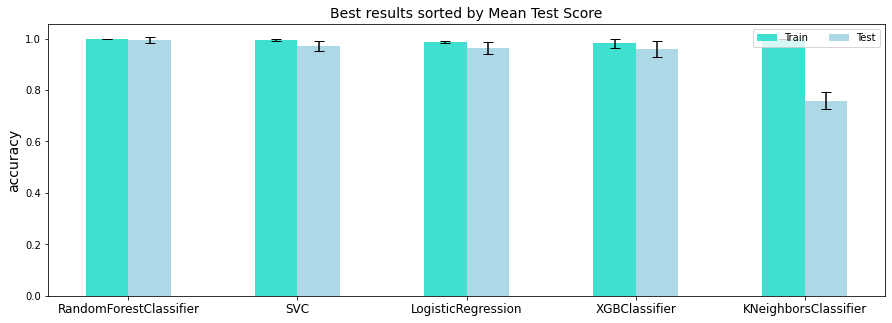

In [ ]:
model.plot_results()

In [ ]:
from jcopml.feature_importance import mean_score_decrease

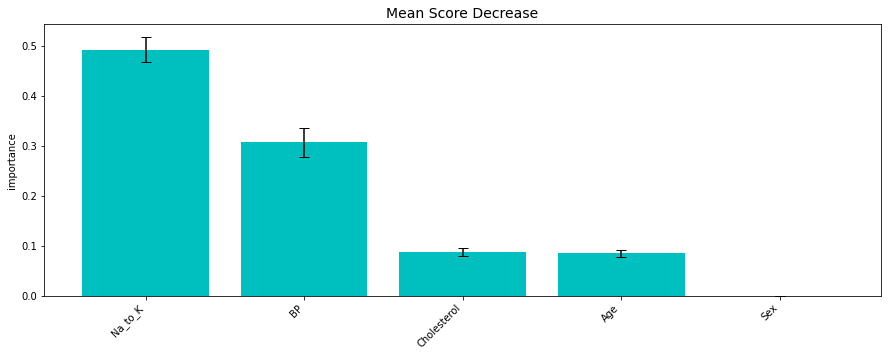

In [ ]:
model.mean_score_decrease()

In [ ]:
model.fit(X, y, cv=5, algo=["rf"], n_trial=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 21
algo__max_features        | 0.26364247048639056
algo__min_samples_leaf    | 1
algo__n_estimators        | 175

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=True, strategy='median')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 1.0
Valid: 1.0
Test : 0.9761904761904762
